In [176]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt

import statsmodels.api as sm
from statsmodels.stats import diagnostic as diag
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.linear_model import LinearRegression, HuberRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error


In [116]:
from CALIBRATION import filedata, readfiles,ScatterPlotVariables, ScatterPlotVariablesperday, LinearRegressionModel, PolynomialRegressionModel,  HuberRegressionModel
file_NO = filedata('2019-08-15-NO-Final.xlsx', 'Base')
# Read data from fike
day, X, y, dataframe = readfiles(file_NO)

In [117]:
#ScatterPlotVariablesperday(day, X,y,dataframe.columns[1:-1]);  plt.show()

In [120]:
# Check multicollinerity

# Calculate the correlation matrix
#corr = dataframe.corr()
#display(corr)
# correlation heatmap
#sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, cmap='RdBu')
# Scatter plot for multicollinearity
#pd.plotting.scatter_matrix(dataframe, alpha=1, figsize = (30,20))
#plt.show()

## Select day 4

In [121]:
dataframe = dataframe[dataframe['Day']==4]
dataframe_before = dataframe
#dataframe_after = dataframe
dataframe_after = dataframe.drop(['Day'], axis=1)

#X1 = sm.tools.add_constant(dataframe_before)
#X2 = sm.tools.add_constant(dataframe_after)

#series_before = pd.Series([variance_inflation_factor(X1.values,i) for i in range(X1.shape[1])],index = X1.columns)
#series_after = pd.Series([variance_inflation_factor(X2.values,i) for i in range(X2.shape[1])],index = X2.columns)

#print("DATA BEFORE")
#print('-'*100)
#display(series_before)

#print("DATA AFTER")
#print('-'*100)
#display(series_after)

In [122]:
# Describe de data set
#desc_df = dataframe.describe()

#desc_df.loc['+3_std'] = desc_df.loc['mean'] + (desc_df.loc['std']*3)
#desc_df.loc['-3_std'] = desc_df.loc['mean'] - (desc_df.loc['std']*3)

#desc_df


In [123]:
# Removing outliers using zscore
dataframe_remove = dataframe_after[(np.abs(stats.zscore(dataframe_after)) < 3).all(axis = 1)]
#dataframe_after.index.difference(dataframe_remove.index)

# Linear Regression model

In [234]:
# Build the model using sklearn
X = dataframe_remove.drop('NO_ppb', axis=1)
y = dataframe_remove['NO_ppb']

# Split X and y into X_
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state = 1)

# Create Linear Regression model object
model_lin_reg = LinearRegression()
model_lin_reg.fit(X_train, y_train)

intercept = model_lin_reg.intercept_
coefficient = model_lin_reg.coef_

print("The intercept of our linear regression model is {:.5f}".format(intercept))
for coef in zip(X.columns, model_lin_reg.coef_):
    print("The coefficient for {} is {:.5f}".format(coef[0], coef[1]))
    
# Prediction plot X_test 
#y_pred = model_lin_reg.predict(X_test)

#model_mse = mean_squared_error(y_test, y_pred)
#model_r2 = r2_score(y_test, y_pred)

#plt.scatter(X_test['NO_We'], y_test )
#print(model_mse, model_r2)

#import pickle
#with open('my_multilinear_regression_NO.sav','wb') as f:
#    pickle.dump(model_lin_reg,f)

The intercept of our linear regression model is 49.42761
The coefficient for Humidity is -0.03311
The coefficient for Temperature is -0.46217
The coefficient for NO_We is 826.16364
The coefficient for NO_Aux is -998.35629


## Linear Model with sm

In [240]:
# define output
#X2 = sm.add_constant(X)
# create model with OLS
model_lin_reg_2 = sm.OLS(y, X)
# fir the data
est = model_lin_reg_2.fit()
print(est.summary())

                            OLS Regression Results                            
Dep. Variable:                 NO_ppb   R-squared:                       0.874
Model:                            OLS   Adj. R-squared:                  0.865
Method:                 Least Squares   F-statistic:                     91.95
Date:                Fri, 16 Aug 2019   Prob (F-statistic):           3.45e-23
Time:                        22:12:34   Log-Likelihood:                -119.48
No. Observations:                  57   AIC:                             247.0
Df Residuals:                      53   BIC:                             255.1
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Humidity       -0.0307      0.038     -0.814      

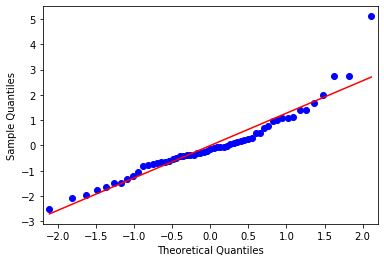

The mean of the residuals is -1.188e-05


In [239]:
# check normality of Residuals
import pylab
sm.qqplot(est.resid, line='s')
pylab.show()
mean_residuals = sum(est.resid)/len(est.resid)
print("The mean of the residuals is {:.4}".format(mean_residuals))

In [237]:
# Elliminate insignificant variables
#dataframe_remove_2 = dataframe_remove.drop('Humidity', axis=1)
#X = dataframe_remove_2.drop('NO_ppb', axis=1)
#print(X)
#y = dataframe_remove_2['NO_ppb']
#print(y)
# define output
#X2 = sm.add_constant(X)
# create model with OLS
#model_lin_reg_2 = sm.OLS(y, X)
# fir the data
#est = model_lin_reg_2.fit()
#print(est.summary())

# Polynomial Regression

In [238]:
poly_2 = PolynomialFeatures(degree=2, interaction_only=False,include_bias=False)
X_poly_2 = poly_2.fit_transform(X)
print(poly_2.get_feature_names())
model_poly_2 = LinearRegression(fit_intercept =False, normalize = True)

model_poly_2.fit(X_poly_2, y)
r_sq = model_poly_2.score(X_poly_2, y)
#print('coefficient of determination:', r_sq)
#print('intercept:', model_poly_2.intercept_)
#print('slope:', model_poly_2.coef_)
    
#X2_ = sm.add_constant(X_poly_2)
est = sm.OLS(y, X_poly_2).fit()
print(est.summary(xname=['Humidity', 'Temperature', 'NO_We', 'NO_Aux', 'Humidity^2', 'Humidity*Temperature', 'Humidity*NO_We', 'Humidity*NO_Aux','Temperature^2', 'Temperature*NO_We', 'Temperature*NO_Aux', 'NO_We^2','NO_We*NO_Aux', 'NO_Aux^2']))
#print(est.summary())

['x0', 'x1', 'x2', 'x3', 'x0^2', 'x0 x1', 'x0 x2', 'x0 x3', 'x1^2', 'x1 x2', 'x1 x3', 'x2^2', 'x2 x3', 'x3^2']
                            OLS Regression Results                            
Dep. Variable:                 NO_ppb   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                     54.76
Date:                Fri, 16 Aug 2019   Prob (F-statistic):           9.56e-23
Time:                        22:01:27   Log-Likelihood:                -94.875
No. Observations:                  57   AIC:                             217.7
Df Residuals:                      43   BIC:                             246.4
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------